## Final Notebook Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
housing_df['datetime'] = pd.to_datetime(housing_df['date'])
housing_df['soldyear'] = housing_df['datetime'].dt.year
housing_df['age_when_sold'] = housing_df['soldyear'] - housing_df['yr_built']

In [5]:
housing_df['grade_num'] = housing_df['grade'].str.split()
housing_df['grade_num'] = housing_df['grade_num'].str[0]
housing_df['grade_num'] = housing_df['grade_num'].astype(int)

In [6]:
housing_df['sqft_basement'] = housing_df['sqft_living'] - housing_df['sqft_above']
housing_df['Basement'] = None
housing_df['Basement'] = housing_df['sqft_basement'].map(lambda x: False if x == 0 else True)
housing_df['Basement'] = housing_df['Basement'].astype(int)

In [7]:
replace_dict = {0.75: 1, 1.75: 2, 2.75: 3, 3.75: 4, 4.75: 5, 5.75: 6, 6.75: 7, 7.75: 8, 
                1.25: 1.5, 2.25: 2.5, 3.25: 3.5, 4.25: 4.5, 5.25: 5.5, 6.25: 6.5}
housing_df['bathrooms'] = housing_df['bathrooms'].replace(replace_dict)

In [18]:
housing_df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [19]:
replace_dict2 = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
housing_df['condition'] = housing_df['condition'].replace(replace_dict2)

In [8]:
from sklearn.impute import SimpleImputer
wtr_col = housing_df[['waterfront']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer.fit(wtr_col)
waterfront_imputed = imputer.transform(wtr_col)
housing_df.waterfront = waterfront_imputed

In [9]:
from sklearn.preprocessing import OrdinalEncoder
wtr_col = housing_df[['waterfront']]
encoder_wtr = OrdinalEncoder()
encoder_wtr.fit(wtr_col)
encoded_wtr = encoder_wtr.transform(wtr_col)
encoded_wtr = encoded_wtr.flatten()
housing_df.waterfront = encoded_wtr

In [13]:
from sklearn.impute import SimpleImputer
view_col = housing_df[['view']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NONE')
imputer.fit(view_col)
view_imputed = imputer.transform(view_col)
housing_df.view = view_imputed

In [14]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
datetime            0
soldyear            0
age_when_sold       0
grade_num           0
Basement            0
dtype: int64

In [20]:
housing_ols = housing_df.drop(['datetime', 'date', 'soldyear', 'yr_built', 'lat', 'long',
'zipcode', 'sqft_above', 'sqft_lot15', 'sqft_living15', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated'], axis = 1)

In [21]:
housing_ols

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,age_when_sold,grade_num,Basement
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0.0,NONE,3,59,7,0
1,6414100192,538000.0,3,2.5,2570,7242,2.0,0.0,NONE,3,63,7,1
2,5631500400,180000.0,2,1.0,770,10000,1.0,0.0,NONE,3,82,6,0
3,2487200875,604000.0,4,3.0,1960,5000,1.0,0.0,NONE,5,49,7,1
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0.0,NONE,3,28,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.5,1530,1131,3.0,0.0,NONE,3,5,8,0
21593,6600060120,400000.0,4,2.5,2310,5813,2.0,0.0,NONE,3,1,8,0
21594,1523300141,402101.0,2,1.0,1020,1350,2.0,0.0,NONE,3,5,7,0
21595,291310100,400000.0,3,2.5,1600,2388,2.0,0.0,NONE,3,11,8,0


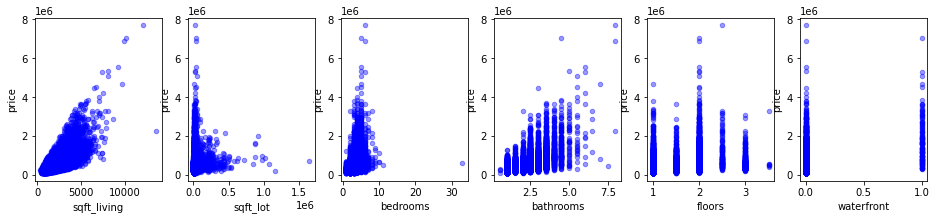

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'waterfront'], axes):
    housing_ols.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')